<a href="https://colab.research.google.com/github/JoshiRawr/CCMACLRL_EXERCISES_COM231/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4: Hate Speech Classification using Multinomial Naive Bayes

Instructions:
- You do not need to split your data. Use the training, validation and test sets provided below.
- Use Multinomial Naive Bayes to train a model that can classify if a sentence is a hate speech or non-hate speech
- A sentence with a label of zero (0) is classified as non-hate speech
- A sentence with a label of one (1) is classified as a hate speech

Apply text pre-processing techniques such as
- Converting to lowercase
- Stop word Removal
- Removal of digits, special characters
- Stemming or Lemmatization but not both
- Count Vectorizer or TF-IDF Vectorizer but not both

Evaluate your model by:
- Providing input by yourself
- Creating a Confusion Matrix
- Calculating the Accuracy, Precision, Recall and F1-Score

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression

In [38]:
splits = {'train': 'unique_train_dataset.csv', 'validation': 'unique_validation_dataset.csv', 'test': 'unique_test_dataset.csv'}

**Training Set**

Use this to train your model

In [39]:
df_train = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["train"])

**Validation Set**

Use this set to evaluate your model

In [40]:
df_validation = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["validation"])

**Test Set**
  
Use this set to test your model

In [41]:
df_test = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["test"])

## A. Understanding your training data

1. Check the first 10 rows of the training dataset

In [42]:
df_train.head(10)

,text,label
0,Presidential candidate Mar Roxas implies that ...,1
1,Parang may mali na sumunod ang patalastas ng N...,1
2,Bet ko. Pula Ang Kulay Ng Posas,1
3,[USERNAME] kakampink,0
4,Bakit parang tahimik ang mga PINK about Doc Wi...,1
5,"""Ang sinungaling sa umpisa ay sinungaling hang...",1
6,Leni Kiko,0
7,Nahiya si Binay sa Makati kaya dito na lang sa...,1
8,Another reminderHalalan,0
9,[USERNAME] Maybe because VP Leni Sen Kiko and ...,0


2. Check how many rows and columns are in the training dataset using `.info()`

In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21773 entries, 0 to 21772
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21773 non-null  object
 1   label   21773 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 340.3+ KB


3. Check for NaN values

In [44]:
df_train.isnull().sum()

,0
text,0
label,0


4. Check for duplicate rows

In [45]:
df_train.duplicated().sum()

np.int64(0)

5. Check how many rows belong to each class

In [46]:
df_train['label'].value_counts()

,count
label,
1,10994
0,10779


## B. Text pre-processing

6. Remove duplicate rows

In [47]:
df_train.drop_duplicates(inplace=True)
df_train.duplicated().sum()

np.int64(0)

7. Remove rows with NaN values

In [48]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

,0
text,0
label,0


8. Convert all text to lowercase

In [49]:
df_train['text'] = df_train['text'].str.lower()
df_train.head()


,text,label
0,presidential candidate mar roxas implies that ...,1
1,parang may mali na sumunod ang patalastas ng n...,1
2,bet ko. pula ang kulay ng posas,1
3,[username] kakampink,0
4,bakit parang tahimik ang mga pink about doc wi...,1


9. Remove digits, URLS and special characters

In [50]:
import re
df_train['text'] = df_train['text'].apply(lambda x: re.sub(r'http\S+', '', x))
df_train['text']

,text
0,presidential candidate mar roxas implies that ...
1,parang may mali na sumunod ang patalastas ng n...
2,bet ko. pula ang kulay ng posas
3,[username] kakampink
4,bakit parang tahimik ang mga pink about doc wi...
...,...
21768,marcos talunan marcos magnanakaw
21769,grabe kayo kay binay ??????????
21770,[username] cnu ba naman ang hindimabibighani s...
21771,rt [username]: tabi tabi yung mga nagsasabing ...


In [51]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df_train['text'] = df_train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

df_train.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label
0,presidential candidate mar roxas implies govt ...,1
1,parang may mali na sumunod ang patalastas ng n...,1
2,bet ko. pula ang kulay ng posas,1
3,[username] kakampink,0
4,bakit parang tahimik ang mga pink doc willie o...,1


10. Remove stop words

In [52]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords', quiet=True)
nltk.download('punkt_tab', quiet=True) # Download the missing resource

stop_words = set(stopwords.words('english'))

11. Use Stemming or Lemmatization

In [53]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

def clean_message(message):
  stemmer = PorterStemmer()
  # Tokenize the message and remove stop words and stem words
  words = word_tokenize(message)
  cleaned_words = [stemmer.stem(word) for word in words if word not in stop_words]
  # Join the cleaned words back into a string
  return " ".join(cleaned_words)

df_train['text'] = df_train['text'].apply(clean_message)
df_train.head()

,text,label
0,presidenti candid mar roxa impli govt liabl : ...,1
1,parang may mali na sumunod ang patalasta ng ne...,1
2,bet ko . pula ang kulay ng posa,1
3,[ usernam ] kakampink,0
4,bakit parang tahimik ang mga pink doc willi on...,1


## C. Training your model

12. Put all text training data in variable **X_train**

In [67]:
X_train = df_train['text']
X_train


,text
0,presidenti candid mar roxa impli govt liabl : ...
1,parang may mali na sumunod ang patalasta ng ne...
2,bet ko . pula ang kulay ng posa
3,[ usernam ] kakampink
4,bakit parang tahimik ang mga pink doc willi on...
...,...
21768,marco talunan marco magnanakaw
21769,grabe kayo kay binay ? ? ? ? ? ? ? ? ? ?
21770,[ usernam ] cnu ba naman ang hindimabibighani ...
21771,rt [ usernam ] : tabi tabi yung mga nagsasab p...


13. Put all training data labels in variable **y_train**

In [68]:
y_train = df_train['label']
y_train


,label
0,1
1,1
2,1
3,0
4,1
...,...
21768,1
21769,0
21770,0
21771,1


14. Use `CountVectorizer()` or `TfidfVectorizer()` to convert text data to its numerical form.

Put the converted data to **X_train_transformed** variable

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_train_transformed

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 295799 stored elements and shape (21773, 33970)>

15. Create an instance of `MultinomalNB()`

In [70]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()


16. Train the model using `.fit()`

In [71]:
model.fit(X_train_transformed, y_train)

MultinomialNB()

## D. Evaluate your model

17. Use `.predict()` to generate model predictions using the **validation dataset**


- Put all text validation data in **X_validation** variable

- Convert **X_validation** to its numerical form.

- Put the converted data to **X_validation_transformed**

- Put all predictions in **y_validation_pred** variable

In [72]:
X_validation = df_validation['text']
X_validation_transformed = vectorizer.transform(X_validation)
y_validation_pred = model.predict(X_validation_transformed)

18. Get the Accuracy, Precision, Recall and F1-Score of the model using the **validation dataset**

- Put all validation data labels in **y_validation** variable

In [60]:
# put your answer here

19. Create a confusion matrix using the **validation dataset**

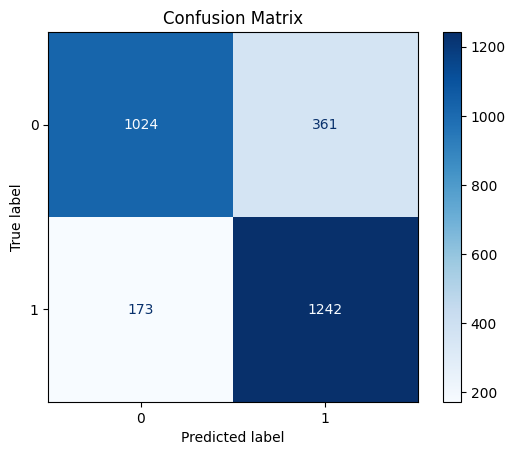

In [82]:
cm = confusion_matrix(y_validation, y_validation_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

20. Use `.predict()` to generate the model predictions using the **test dataset**


- Put all text validation data in **X_test** variable

- Convert **X_test** to its numerical form.

- Put the converted data to **X_test_transformed**

- Put all predictions in **y_test_pred** variable

In [83]:
X_test = df_test['text']
X_test_transformed = vectorizer.transform(X_test)
y_test_pred = model.predict(X_test_transformed)


21. Get the Accuracy, Precision, Recall and F1-Score of the model using the **test dataset**

- Put all test data labels in **y_validation** variable



In [84]:
y_test = df_test['label']

22. Create a confusion matrix using the **test dataset**

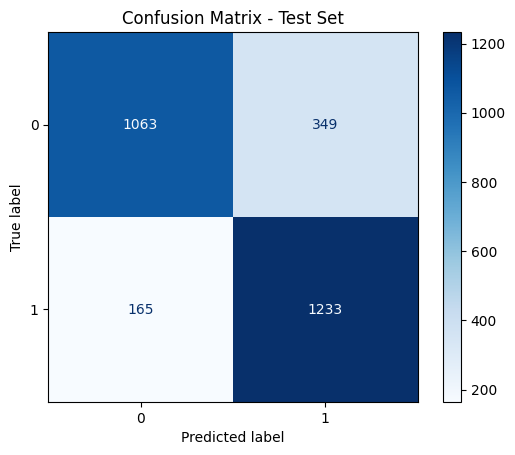

In [87]:
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
disp_test.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Test Set")
plt.show()

## E. Test the model

23. Test the model by providing a non-hate speech input. The model should predict it as 0

In [88]:
non_hate_speech_input = "Your hair clips looks super good! Where did you buy them?"

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words] #
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)


processed_input = preprocess_text(non_hate_speech_input)

transformed_input = vectorizer.transform([processed_input])

prediction = model.predict(transformed_input)

print(f"Predicted label: {prediction[0]}")

Predicted label: 0


24. Test the model by providing a hate speech input. The model should predict it as 1

In [90]:
hate_speech_input = "Your hair looks horrible!"
processed_input = preprocess_text(hate_speech_input)

transformed_input = vectorizer.transform([processed_input])

prediction = model.predict(transformed_input)

print(f"Predicted label: {prediction[0]}")


Predicted label: 1
